In [43]:
import torch
import numpy as np

In [44]:
x = torch.empty(2, 2)
x

tensor([[3.9419e-35, 0.0000e+00],
        [3.9236e-44, 0.0000e+00]])

In [45]:
x = torch.rand(2, 2)
x

tensor([[0.3640, 0.4674],
        [0.0173, 0.2923]])

In [46]:
y = torch.rand(2, 2)
y

tensor([[0.4750, 0.5220],
        [0.0811, 0.8486]])

In [47]:
z = torch.sub(x, y)
z

tensor([[-0.1110, -0.0546],
        [-0.0639, -0.5562]])

In [48]:
x[1, 1].item()

0.29232925176620483

In [49]:
a = torch.ones(2, 2)
b = a.numpy
a, b

(tensor([[1., 1.],
         [1., 1.]]), <function Tensor.numpy>)

In [50]:
a.add_(1)
a, b

(tensor([[2., 2.],
         [2., 2.]]), <function Tensor.numpy>)

In [51]:
a = np.ones(5)
b = torch.from_numpy(a)
a, b

(array([1., 1., 1., 1., 1.]),
 tensor([1., 1., 1., 1., 1.], dtype=torch.float64))

In [52]:
if torch.cuda.is_available():
  device = torch.device("cuda")
  x = torch.ones(5, device=device)
  y = torch.ones(5)
  y = y.to(device)
  z = x + y
  z = z.to("cpu") # gpu tensor is not avalable to convert to numpy
  z.numpy()

In [53]:
x = torch.ones(5, requires_grad=True)
x

tensor([1., 1., 1., 1., 1.], requires_grad=True)

In [54]:
x = torch.randn(3)
y = torch.randn(3, requires_grad=True)
x, y

(tensor([-0.7147,  0.4533, -0.2939]),
 tensor([ 0.7972,  0.0848, -1.0360], requires_grad=True))

In [55]:
x = torch.ones(3, requires_grad=True)
print(x)

y = x + 2
print(y)

z = y * y * 2
print(z)
z = z.mean()
print(z)

z.backward()
print(x.grad)

tensor([1., 1., 1.], requires_grad=True)
tensor([3., 3., 3.], grad_fn=<AddBackward0>)
tensor([18., 18., 18.], grad_fn=<MulBackward0>)
tensor(18., grad_fn=<MeanBackward0>)
tensor([4., 4., 4.])


In [56]:
weight = torch.ones(4, requires_grad=True)

for epoch in range(4 ):
  model_output = (weight * 3).sum()
  model_output.backward()

  print(weight.grad)

tensor([3., 3., 3., 3.])
tensor([6., 6., 6., 6.])
tensor([9., 9., 9., 9.])
tensor([12., 12., 12., 12.])


In [57]:
weight = torch.ones(4, requires_grad=True)

for epoch in range(4 ):
  model_output = (weight * 3).sum()
  model_output.backward()

  print(weight.grad)

  weight.grad.zero_()

tensor([3., 3., 3., 3.])
tensor([3., 3., 3., 3.])
tensor([3., 3., 3., 3.])
tensor([3., 3., 3., 3.])


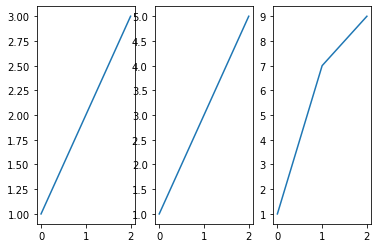

In [58]:
import matplotlib.pyplot as plt

base = [0, 1, 2] # x data

a = [1, 2, 3] # y data1
b = [1, 3, 5] # y data2
c = [1, 7, 9] # y data3

data = [a, b, c] # full data

fir, ax = plt.subplots(1,3)
for i in range(3):
  ax[i].plot(base, data[i])
plt.show()

In [59]:
x = torch.tensor(1.0)
y = torch.tensor(2.0)

w = torch.tensor(1.0, requires_grad=True)

y_hat = w * x
loss = (y_hat - y)**2

print(loss)

loss.backward()
print(w.grad)

tensor(1., grad_fn=<PowBackward0>)
tensor(-2.)


In [60]:
x = np.array([1, 2, 3, 4], dtype=np.float32)
y = np.array([2, 4, 6, 8], dtype=np.float32)

w = 0.0

def foward(x):
  return w * x

def loss(y, y_pred):
  return ((y_pred - y)**2).mean()

def gradient(x, y, y_pred):
  return np.dot(2*x, y_pred - y).mean()

print(f"Prediction before training: f(5) = {foward(5):.3f}")

learning_rate = 0.01
n_iters = 15

for epoch in range(n_iters):
  y_pred = foward(x)

  l = loss(y, y_pred)

  dw = gradient(x, y, y_pred)

  w -= learning_rate * dw

  if epoch % 1 == 0:
    print(f"epoch {epoch+1}: w = {w:.3f}, loss = {l:.8f}")

print(f"Prediction after training: f(5) = {foward(5):.3f}")


Prediction before training: f(5) = 0.000
epoch 1: w = 1.200, loss = 30.00000000
epoch 2: w = 1.680, loss = 4.79999924
epoch 3: w = 1.872, loss = 0.76800019
epoch 4: w = 1.949, loss = 0.12288000
epoch 5: w = 1.980, loss = 0.01966083
epoch 6: w = 1.992, loss = 0.00314574
epoch 7: w = 1.997, loss = 0.00050331
epoch 8: w = 1.999, loss = 0.00008053
epoch 9: w = 1.999, loss = 0.00001288
epoch 10: w = 2.000, loss = 0.00000206
epoch 11: w = 2.000, loss = 0.00000033
epoch 12: w = 2.000, loss = 0.00000005
epoch 13: w = 2.000, loss = 0.00000001
epoch 14: w = 2.000, loss = 0.00000000
epoch 15: w = 2.000, loss = 0.00000000
Prediction after training: f(5) = 10.000


In [61]:
x = torch.tensor([1, 2, 3, 4], dtype=torch.float32)
y = torch.tensor([2, 4, 6, 8], dtype=torch.float32)

w = torch.tensor(0.0, dtype=torch.float32, requires_grad=True)

def foward(x):
  return w * x

def loss(y, y_pred):
  return ((y_pred - y)**2).mean()

print(f"Prediction before training: f(5) = {foward(5):.3f}")

learning_rate = 0.01
n_iters = 100

for epoch in range(n_iters):
  y_pred = foward(x)

  l = loss(y, y_pred)

  l.backward()
  
  with torch.no_grad():
    w -= learning_rate * w.grad

  w.grad.zero_()

  if epoch % 10 == 0:
    print(f"epoch {epoch+1}: w = {w:.3f}, loss = {l:.8f}")

print(f"Prediction after training: f(5) = {foward(5):.3f}")

Prediction before training: f(5) = 0.000
epoch 1: w = 0.300, loss = 30.00000000
epoch 11: w = 1.665, loss = 1.16278565
epoch 21: w = 1.934, loss = 0.04506890
epoch 31: w = 1.987, loss = 0.00174685
epoch 41: w = 1.997, loss = 0.00006770
epoch 51: w = 1.999, loss = 0.00000262
epoch 61: w = 2.000, loss = 0.00000010
epoch 71: w = 2.000, loss = 0.00000000
epoch 81: w = 2.000, loss = 0.00000000
epoch 91: w = 2.000, loss = 0.00000000
Prediction after training: f(5) = 10.000


In [62]:
import torch.nn as nn

x = torch.tensor([[1], [2], [3], [4]], dtype=torch.float32)
y = torch.tensor([[2], [4], [6], [8]], dtype=torch.float32)


x_test = torch.tensor([5], dtype=torch.float32)
n_samples, n_features = x.shape

input_size = output_size = n_features
model = nn.Linear(input_size, output_size)

print(f"Prediction before training: f(5) = {model(x_test).item():.3f}")

learning_rate = 0.01
n_iters = 100

loss = nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

for epoch in range(n_iters):
  y_pred = model(x)

  l = loss(y, y_pred)

  l.backward()

  optimizer.step()

  optimizer.zero_grad()

  if epoch % 10 == 0:
    [w, b] = model.parameters()
    print(f"epoch {epoch+1}: w = {w[0][0].item():.3f}, loss = {l:.8f}")

print(f"Prediction after training: f(5) = {model(x_test).item():.3f}")

Prediction before training: f(5) = -1.446
epoch 1: w = 0.003, loss = 38.26111603
epoch 11: w = 1.426, loss = 1.11934555
epoch 21: w = 1.663, loss = 0.15086445
epoch 31: w = 1.708, loss = 0.11871200
epoch 41: w = 1.722, loss = 0.11119765
epoch 51: w = 1.731, loss = 0.10470977
epoch 61: w = 1.739, loss = 0.09861467
epoch 71: w = 1.747, loss = 0.09287483
epoch 81: w = 1.755, loss = 0.08746897
epoch 91: w = 1.762, loss = 0.08237791
Prediction after training: f(5) = 9.522


In [72]:
import torch.nn as nn

x = torch.tensor([[1], [2], [3], [4]], dtype=torch.float32)
y = torch.tensor([[2], [4], [6], [8]], dtype=torch.float32)


x_test = torch.tensor([5], dtype=torch.float32)
n_samples, n_features = x.shape

input_size = output_size = n_features

class LinearRegression(nn.Module):
  def __init__(self, input_dim, output_dim):
    super(LinearRegression, self).__init__()

    self.lin = nn.Linear(input_dim, output_dim)

  def forward(self, x):
    return self.lin(x)
  
model = LinearRegression(input_size, output_size)

print(f"Prediction before training: f(5) = {model(x_test).item():.3f}")

learning_rate = 0.01
n_iters = 100

loss = nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

for epoch in range(n_iters):
  y_pred = model(x)

  l = loss(y, y_pred)

  l.backward()

  optimizer.step()

  optimizer.zero_grad()

  if epoch % 10 == 0:
    [w, b] = model.parameters()
    print(f"epoch {epoch+1}: w = {w[0][0].item():.3f}, loss = {l:.8f}")

print(f"Prediction after training: f(5) = {model(x_test).item():.3f}")

Prediction before training: f(5) = 1.818
epoch 1: w = 0.579, loss = 19.63798141
epoch 11: w = 1.598, loss = 0.56884354
epoch 21: w = 1.767, loss = 0.07194326
epoch 31: w = 1.800, loss = 0.05575633
epoch 41: w = 1.810, loss = 0.05220056
epoch 51: w = 1.816, loss = 0.04915418
epoch 61: w = 1.821, loss = 0.04629290
epoch 71: w = 1.827, loss = 0.04359839
epoch 81: w = 1.832, loss = 0.04106077
epoch 91: w = 1.837, loss = 0.03867082
Prediction after training: f(5) = 9.673
